In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv("titanic-training-data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gillespie, Mr. William Henry",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

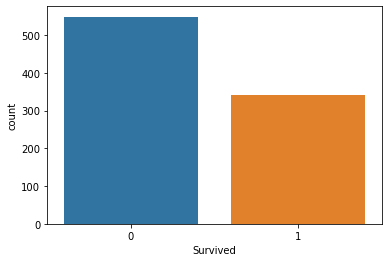

In [8]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

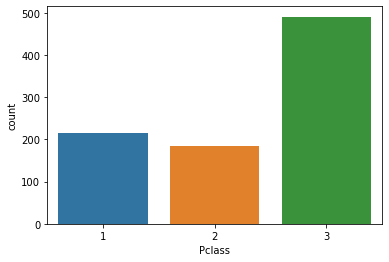

In [9]:
sns.countplot(x="Pclass", data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

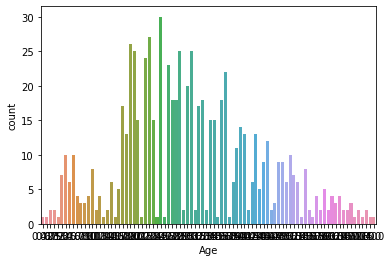

In [10]:
sns.countplot(x="Age", data=df)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

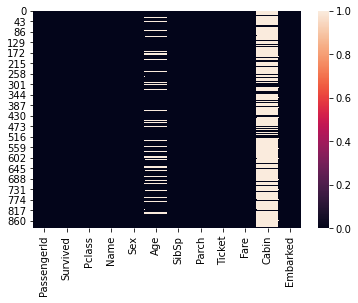

In [12]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

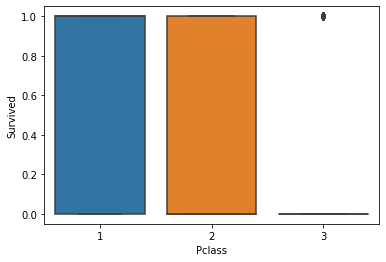

In [13]:
sns.boxplot(x="Pclass", y="Survived", data=df)

In [14]:
df.drop("Cabin", axis=1, inplace=True)

In [15]:
df.dropna(inplace=True)

<AxesSubplot:>

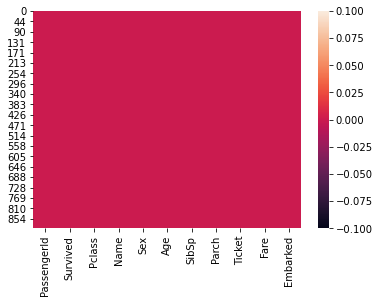

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.drop("Name",axis=1, inplace=True)

In [18]:
df.drop("PassengerId", axis=1, inplace=True)

In [19]:
Sex=pd.get_dummies(df["Sex"])

In [20]:
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [21]:
Sex=pd.get_dummies(df["Sex"], drop_first=True)

In [22]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
emb=pd.get_dummies(df["Embarked"])
emb.head()


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
emb=pd.get_dummies(df["Embarked"], drop_first=True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
pclass=pd.get_dummies(df["Pclass"])
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [26]:
pclass=pd.get_dummies(df["Pclass"], drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [27]:
df=pd.concat([df,Sex,emb,pclass],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,0,3,male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [28]:
df.drop(["Sex","Pclass","Fare","Embarked","Ticket"],axis=1,inplace=True)

In [29]:
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [30]:
x=df.drop('Survived', axis=1)
y=df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)

## LOGISTIC REGRESSION

In [31]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [32]:
predictions=reg_model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7990654205607477

In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       135
           1       0.73      0.72      0.73        79

    accuracy                           0.80       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214



<AxesSubplot:>

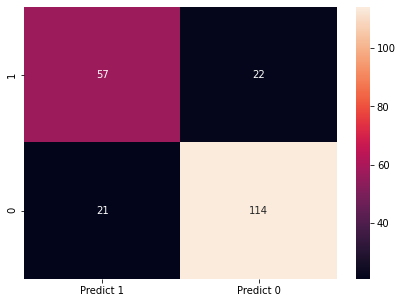

In [35]:
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']], columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree= DecisionTreeClassifier(criterion='gini', random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [38]:
dtree.score(x_train,y_train)

0.9497991967871486

In [39]:
dtree.score(x_test,y_test)

0.7897196261682243

In [40]:
dtreeR = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
dtreeR.fit(x_train, y_train)
dtreeR.score(x_train,y_train),dtreeR.score(x_test,y_test)

(0.8554216867469879, 0.8411214953271028)

## ENSEMBLE TECHNIQUES

In [41]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(n_estimators=100, base_estimator=dtree,random_state=1)
bgcl=bgcl.fit(x_train,y_train)

0.9497991967871486
0.8130841121495327
0.8130841121495327


<AxesSubplot:>

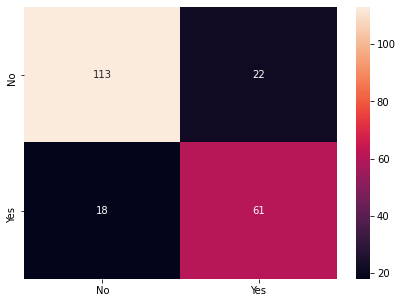

In [42]:
y_predict=bgcl.predict(x_test)
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))
print(metrics.accuracy_score(y_test, y_predict))
cm=metrics.confusion_matrix(y_test,y_predict, labels=[0,1])
df_cm=pd.DataFrame(cm, index = [i for i in['No','Yes']],columns=[i for i in['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=100, max_features=5,random_state=1)
rfcl=rfcl.fit(x_train,y_train)
rfcl=rfcl.fit(x_train,y_train)

0.9497991967871486
0.8037383177570093
0.8037383177570093


<AxesSubplot:>

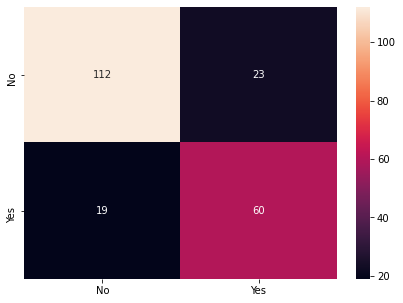

In [44]:
y_predict=rfcl.predict(x_test)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))
print(metrics.accuracy_score(y_test, y_predict))
cm=metrics.confusion_matrix(y_test,y_predict, labels=[0,1])
df_cm=pd.DataFrame(cm, index = [i for i in['No','Yes']],columns=[i for i in['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [45]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=10,random_state=1)
abcl=rfcl.fit(x_train,y_train)
abcl=rfcl.fit(x_train,y_train)

0.9497991967871486
0.8037383177570093
0.8037383177570093


<AxesSubplot:>

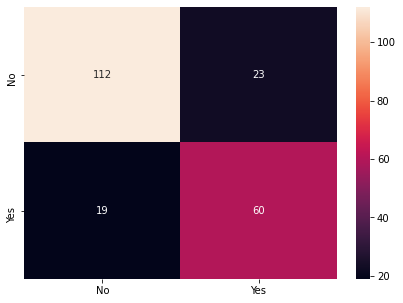

In [46]:
y_predict=abcl.predict(x_test)
print(abcl.score(x_train,y_train))
print(abcl.score(x_test,y_test))
print(metrics.accuracy_score(y_test, y_predict))
cm=metrics.confusion_matrix(y_test,y_predict, labels=[0,1])
df_cm=pd.DataFrame(cm, index = [i for i in['No','Yes']],columns=[i for i in['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=10,random_state=1)
gbcl=rfcl.fit(x_train,y_train)
gbcl=rfcl.fit(x_train,y_train)

0.9497991967871486
0.8037383177570093
0.8037383177570093


<AxesSubplot:>

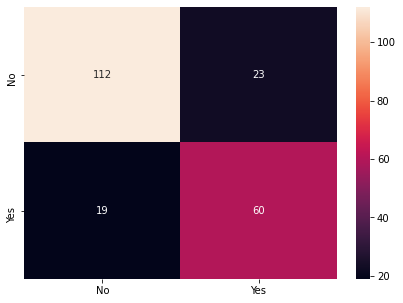

In [48]:
y_predict=gbcl.predict(x_test)
print(gbcl.score(x_train,y_train))
print(gbcl.score(x_test,y_test))
print(metrics.accuracy_score(y_test, y_predict))
cm=metrics.confusion_matrix(y_test,y_predict, labels=[0,1])
df_cm=pd.DataFrame(cm, index = [i for i in['No','Yes']],columns=[i for i in['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## K Neighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [50]:
xscaled=x.apply(zscore)
xscaled.describe()

,Age,SibSp,Parch,male,Q,S,2,3
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,2.584933e-16,4.216353e-16,-1.372186e-17,5.083325e-17,-4.740278e-17,7.921254e-17,1.425202e-16,-1.668453e-16
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-2.017717e+00,-5.527137e-01,-5.067874e-01,-1.322511e+00,-2.023257e-01,-1.872519e+00,-5.665375e-01,-9.971949e-01
25%,-6.657639e-01,-5.527137e-01,-5.067874e-01,-1.322511e+00,-2.023257e-01,5.340398e-01,-5.665375e-01,-9.971949e-01
50%,-1.133826e-01,-5.527137e-01,-5.067874e-01,7.561375e-01,-2.023257e-01,5.340398e-01,-5.665375e-01,-9.971949e-01
75%,5.770939e-01,5.225108e-01,6.647471e-01,7.561375e-01,-2.023257e-01,5.340398e-01,-5.665375e-01,1.002813e+00
max,3.477095e+00,4.823409e+00,6.522419e+00,7.561375e-01,4.942527e+00,5.340398e-01,1.765108e+00,1.002813e+00


In [51]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.3,random_state=1)

In [52]:
NNH=KNeighborsClassifier(n_neighbors=23,metric='euclidean')
NNH.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [53]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test,y_test)

0.7850467289719626

In [55]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [56]:
print("Model Accuracy; {0:.4f}".format(metrics.accuracy_score(y_test,y_predict)))
print()

Model Accuracy; 0.5000



In [57]:
train_predict=model.predict(x_train)

In [58]:
print("Model Accuracy; {0:.4f}".format(metrics.accuracy_score(y_train,train_predict)))
print()

Model Accuracy; 0.7068



In [59]:
from sklearn import svm

In [60]:
clf=svm.SVC(gamma=0.07,C=5)

In [61]:
clf.fit(x_train,y_train)

SVC(C=5, gamma=0.07)

In [62]:
y_pred=clf.predict(x_test)

In [63]:
metrics.accuracy_score(y_test,y_pred)

0.8037383177570093